# Sentiment Analysis
- Contact Info
  - Author: TENG-LIN YU
  - Email: tlyu0419@gmail.com
  - Facebook: https://www.facebook.com/tlyu0419
  - PYPI: https://pypi.org/project/facebook-crawler/
  - Github: https://github.com/TLYu0419/facebook_crawler

## Import packages

In [1]:
# !pip install jieba
# !pip install snownlp
# !pip install nltk
# !pip install translate
# !pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import os
import re
import jieba
import requests
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from snownlp import SnowNLP
from translate import Translator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set(rc={'figure.figsize':(16.7,8.27)})

## Load data

In [28]:
path = '/home/tlyu0419/github/facebook_crawler/develop/data/'
os.listdir(path)

['20220414_ezmoney.tw.pkl',
 '20220414_emily0806.pkl',
 '20220414_BToday.pkl',
 '20220414_moneyweekly.tw.pkl',
 '20220414_StockOldBull.pkl',
 '20220414_smart16888.pkl',
 '20220414_imoneymagazine.pkl',
 '20220414_GreenHornFans.pkl',
 '20220414_MoneyMoneyMeg.pkl',
 '20220414_edigest.pkl',
 '.ipynb_checkpoints',
 '20220414_cmoneyapp.pkl',
 '20220414_smartmonthly.pkl',
 '20220414_Gooaye.pkl',
 '20220414_ebcmoney.pkl',
 '20220414_MoneyDJ.pkl',
 '20220414_ec.ltn.tw.pkl',
 '20220414_wealth1974.pkl',
 '20220414_imoney889.pkl',
 '20220414_YahooTWFinance.pkl']

In [57]:
df = []
for file in os.listdir(path):
    if 'pkl' in file:
        print(file)
        ndf = pd.read_pickle(path + file)
        df.append(ndf)
df = pd.concat(df, ignore_index=True)
df = df.sort_values('UPDATETIME', ascending=False)
print(df.shape)
df = df.drop_duplicates('POSTID', ignore_index=True)
print(df.shape)
df.head(5)

20220414_ezmoney.tw.pkl
20220414_emily0806.pkl
20220414_BToday.pkl
20220414_moneyweekly.tw.pkl
20220414_StockOldBull.pkl
20220414_smart16888.pkl
20220414_imoneymagazine.pkl
20220414_GreenHornFans.pkl
20220414_MoneyMoneyMeg.pkl
20220414_edigest.pkl
20220414_cmoneyapp.pkl
20220414_smartmonthly.pkl
20220414_Gooaye.pkl
20220414_ebcmoney.pkl
20220414_MoneyDJ.pkl
20220414_ec.ltn.tw.pkl
20220414_wealth1974.pkl
20220414_imoney889.pkl
20220414_YahooTWFinance.pkl
(34158, 19)
(34158, 19)


,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,URL,LIKE,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME
0,Yahoo奇摩股市理財,2021-05-29 12:01:00,千萬別「違約交割」！你知道會有什麼風險嗎？\n\n#進擊的荷包 #大佛理財小百科 #違約交割,4004660172952561,114062348679049,8,35,15,5,AQHRjWsWDXBdEM118loMTLKsrlWdgBxXX9Tz19CeLBMgSB...,https://www.facebook.com/YahooTWFinance/,34,0,0,0,0,1,0,2022-04-14 11:25:09
1,Yahoo奇摩股市理財,2022-03-10 11:31:18,前幾天進場的「勇士」們，今天都賺翻了…,4910877802330789,114062348679049,2,31,0,1,AQHRrfNWJ-oG9Pn_91_MwKZAzc7HbxxuA9FMkbUVle2Gw7...,https://www.facebook.com/YahooTWFinance/,31,0,0,0,0,0,0,2022-04-14 11:25:09
2,Yahoo奇摩股市理財,2022-03-09 17:57:56,大家要來救台積電嗎？😂🤪,4908901329195103,114062348679049,2,10,1,1,AQHRGWpKpLQ50FtT6qT9X3ZsqUqwzv2dbzMFjLbTWh61qg...,https://www.facebook.com/YahooTWFinance/,8,0,2,0,0,0,0,2022-04-14 11:25:09
3,Yahoo奇摩股市理財,2022-03-09 18:03:04,小編不只要買一送一，還想要買大送大(喂)😂,4908129385938964,114062348679049,1,2,1,0,AQHR-36oL7T192FjleJUhIM9YL4qB2xd7_ZaG0uPS9qEDC...,https://www.facebook.com/YahooTWFinance/,2,0,0,0,0,0,0,2022-04-14 11:25:09
4,Yahoo奇摩股市理財,2022-03-09 18:34:02,台灣不只缺工人，就連工地主任也找不到人，甚至有建商開出月薪12萬、月休10天和2個月年假的超...,4908100979275138,114062348679049,14,70,4,9,AQHRlPEFR_atb-XsZRqz0b0WTpImUy-jM-wGTXm6uNgfdT...,https://www.facebook.com/YahooTWFinance/,65,0,1,0,0,4,0,2022-04-14 11:25:09


In [58]:
df['DATE'] = df['TIME'].apply(lambda x: x[:10])
df['YM'] = df['DATE'].apply(lambda x: x[:7])
df['HOUR'] = df['TIME'].apply(lambda x: x[10:13])
df.head(3)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR
0,Yahoo奇摩股市理財,2021-05-29 12:01:00,千萬別「違約交割」！你知道會有什麼風險嗎？\n\n#進擊的荷包 #大佛理財小百科 #違約交割,4004660172952561,114062348679049,8,35,15,5,AQHRjWsWDXBdEM118loMTLKsrlWdgBxXX9Tz19CeLBMgSB...,...,0,0,0,0,1,0,2022-04-14 11:25:09,2021-05-29,2021-05,12
1,Yahoo奇摩股市理財,2022-03-10 11:31:18,前幾天進場的「勇士」們，今天都賺翻了…,4910877802330789,114062348679049,2,31,0,1,AQHRrfNWJ-oG9Pn_91_MwKZAzc7HbxxuA9FMkbUVle2Gw7...,...,0,0,0,0,0,0,2022-04-14 11:25:09,2022-03-10,2022-03,11
2,Yahoo奇摩股市理財,2022-03-09 17:57:56,大家要來救台積電嗎？😂🤪,4908901329195103,114062348679049,2,10,1,1,AQHRGWpKpLQ50FtT6qT9X3ZsqUqwzv2dbzMFjLbTWh61qg...,...,0,2,0,0,0,0,2022-04-14 11:25:09,2022-03-09,2022-03,17


## EDA
- by 時間, 發文人的line plot，方便我們設定研究的時間範圍

### 貼文數-Barplot
-  好像有漏資料Orz，可能的原因是抓的時間比較長，抓的過程中有新的貼文導致影響了文章的編號
-  解決的方式有兩種，一種是多抓幾次，最後去除重複，另一種就是不要抓長時間，改成小量頻繁一些抓取資料

In [5]:
# 不同粉絲頁的每天有多少貼文
df = df.loc[df['DATE'].apply(lambda x: '2021-06-01'<= x <= '2022-03-31')]
plotdf = df.groupby(['NAME', 'YM']).size().reset_index(name='CNT').pivot('NAME', 'YM', 'CNT')
plotdf

YM,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
NAME,,,,,,,,,,
CMoney 理財寶,111.0,96.0,142.0,151.0,157.0,164.0,176.0,453.0,452.0,682.0
MoneyDJ理財資訊,153.0,151.0,52.0,47.0,111.0,220.0,228.0,220.0,207.0,248.0
Money錢,104.0,91.0,150.0,197.0,215.0,214.0,221.0,369.0,330.0,501.0
Smart 智富月刊,151.0,159.0,161.0,132.0,146.0,155.0,154.0,275.0,246.0,283.0
Yahoo奇摩股市理財,123.0,151.0,152.0,146.0,141.0,179.0,204.0,324.0,464.0,753.0
iMoney 智富雜誌,274.0,29.0,185.0,174.0,5.0,207.0,215.0,132.0,640.0,736.0
今周刊,226.0,13.0,211.0,183.0,NaN,191.0,234.0,127.0,596.0,739.0
東森財經,261.0,NaN,126.0,307.0,NaN,68.0,332.0,3.0,328.0,965.0
林恩如-飆股女王,69.0,60.0,48.0,64.0,46.0,35.0,38.0,27.0,31.0,58.0


<AxesSubplot:xlabel='YM', ylabel='NAME'>

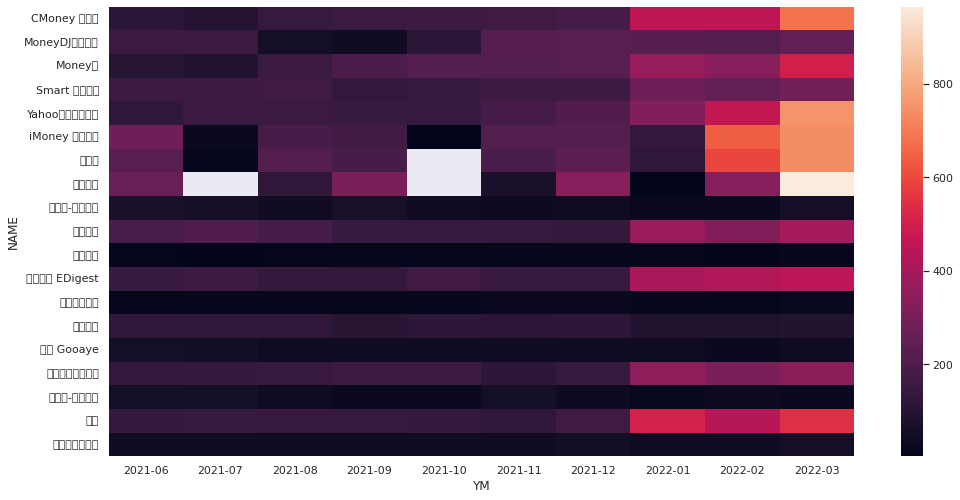

In [8]:
sns.heatmap(plotdf)

<AxesSubplot:xlabel='YM', ylabel='NAME'>

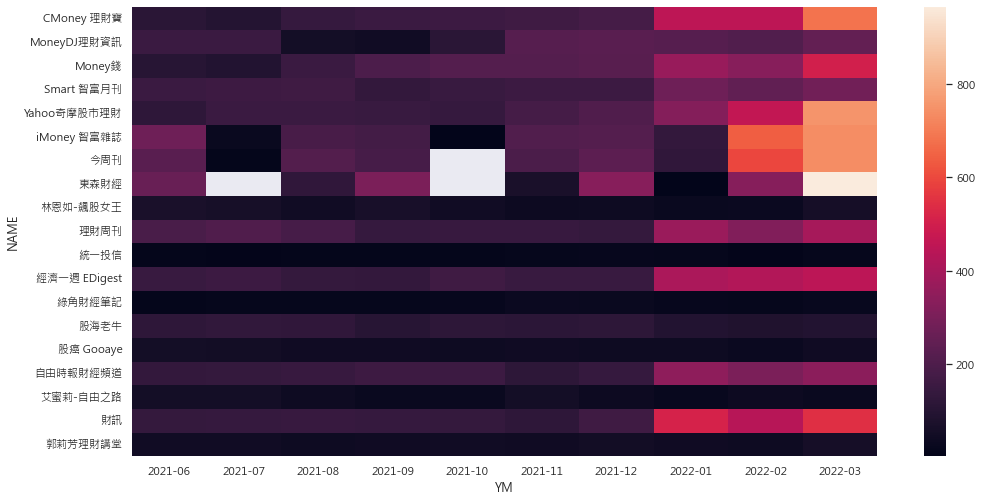

In [6]:
# 處理亂碼
sns.heatmap(plotdf)

### 貼文數量與LIKE數 - scatter plot
- 初步檢視粉絲專頁的影響力

In [7]:
plotdf = df.groupby('NAME')['REACTION_COUNT'].agg(['count', 'median'])
plotdf

,count,median
NAME,,
CMoney 理財寶,2584,9.0
MoneyDJ理財資訊,1637,22.0
Money錢,2392,7.0
Smart 智富月刊,1862,29.0
Yahoo奇摩股市理財,2637,8.0
iMoney 智富雜誌,2597,5.0
今周刊,2520,58.0
東森財經,2390,50.0
林恩如-飆股女王,476,313.0


<AxesSubplot:xlabel='count', ylabel='median'>

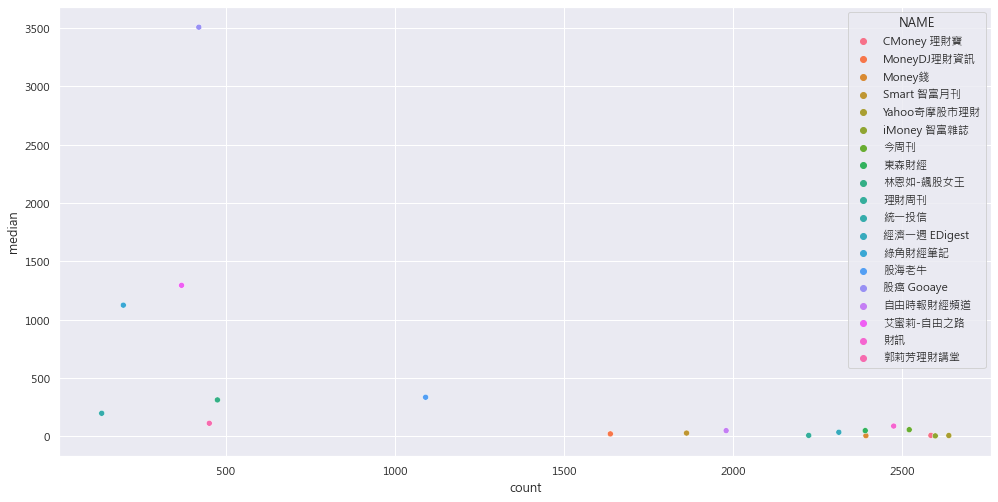

In [8]:
sns.scatterplot(x='count', y='median', data=plotdf, hue='NAME')

### 貼文字數-Boxplot

In [9]:
# 不同粉絲頁的貼文字數
df['MESSAGE_LEN'] = df['MESSAGE'].apply(lambda x: len(x))
df.groupby('NAME')['MESSAGE_LEN'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
NAME,,,,,,,,,,,,,,
CMoney 理財寶,2584.0,83.608359,104.797095,10.0,29.0,34.0,39.0,44.0,50.0,57.0,70.0,95.0,174.0,1517.0
MoneyDJ理財資訊,1637.0,169.879047,81.532727,42.0,107.0,118.2,129.0,141.0,151.0,165.0,178.0,199.8,238.0,984.0
Money錢,2392.0,60.641304,69.248092,16.0,28.0,33.0,36.0,39.0,43.5,48.0,54.0,63.0,93.0,714.0
Smart 智富月刊,1862.0,88.149302,143.745096,3.0,10.0,14.0,17.0,24.0,32.0,44.0,62.0,117.0,240.9,1016.0
Yahoo奇摩股市理財,2637.0,40.787637,36.864757,3.0,16.0,22.0,26.0,30.0,33.0,36.0,41.0,48.0,62.0,384.0
iMoney 智富雜誌,2597.0,185.038121,175.006704,12.0,32.0,41.0,51.0,58.0,74.0,259.0,290.0,348.0,412.0,1547.0
今周刊,2520.0,105.452381,98.098273,10.0,30.0,41.0,50.0,61.0,72.0,88.0,107.0,154.0,225.0,862.0
東森財經,2390.0,57.083264,35.557478,10.0,24.0,28.0,36.0,53.0,57.0,60.0,63.0,68.0,92.0,511.0
林恩如-飆股女王,476.0,170.287815,178.319828,4.0,15.0,27.0,52.0,84.0,115.0,154.0,222.5,282.0,407.5,1696.0


<AxesSubplot:xlabel='MESSAGE_LEN', ylabel='NAME'>

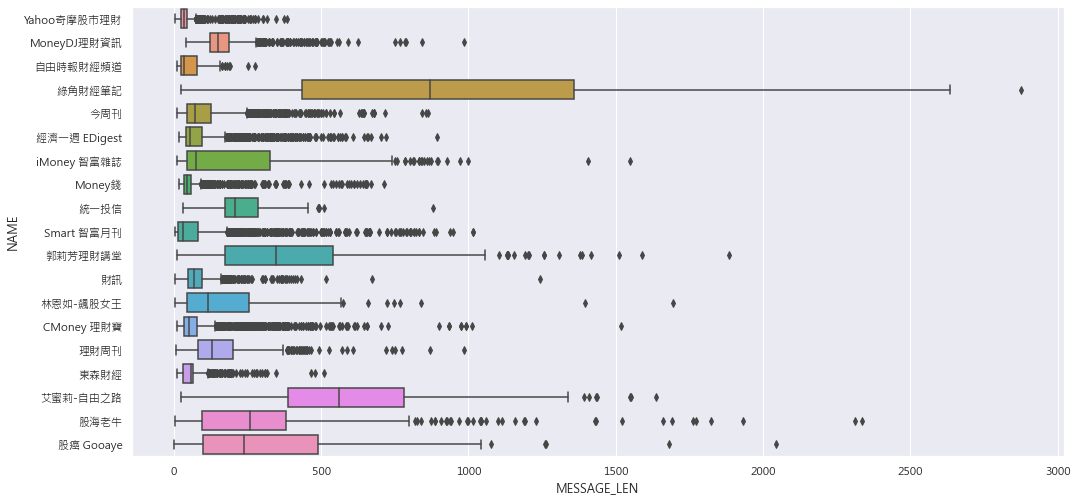

In [10]:
sns.boxplot(x='MESSAGE_LEN', y='NAME', data=df[['NAME', 'MESSAGE', 'MESSAGE_LEN']])

### 發文時段差異 - heatplot

In [11]:
# 發文的時段 by 分鐘
plotdf = df.groupby(['NAME', 'HOUR']).size().reset_index(name='CNT').pivot('NAME', 'HOUR', 'CNT').fillna(0)
plotdf

HOUR,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
NAME,,,,,,,,,,,,,,,,,,,,,
CMoney 理財寶,1.0,0.0,2.0,0.0,0.0,0.0,0.0,32.0,131.0,152.0,...,164.0,150.0,162.0,84.0,265.0,194.0,246.0,205.0,87.0,6.0
MoneyDJ理財資訊,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,158.0,...,118.0,118.0,121.0,112.0,131.0,138.0,144.0,72.0,6.0,1.0
Money錢,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,176.0,48.0,...,140.0,198.0,200.0,4.0,16.0,112.0,201.0,272.0,42.0,5.0
Smart 智富月刊,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,...,201.0,5.0,265.0,8.0,206.0,26.0,189.0,198.0,112.0,0.0
Yahoo奇摩股市理財,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.0,118.0,...,205.0,199.0,157.0,192.0,206.0,180.0,158.0,138.0,92.0,82.0
iMoney 智富雜誌,7.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,100.0,119.0,...,138.0,138.0,214.0,193.0,197.0,241.0,207.0,216.0,183.0,169.0
今周刊,3.0,0.0,1.0,0.0,0.0,0.0,1.0,44.0,115.0,151.0,...,188.0,165.0,152.0,164.0,167.0,170.0,162.0,153.0,152.0,80.0
東森財經,53.0,18.0,1.0,1.0,0.0,0.0,3.0,20.0,75.0,160.0,...,191.0,161.0,162.0,181.0,135.0,116.0,101.0,164.0,88.0,61.0
林恩如-飆股女王,9.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,26.0,35.0,...,29.0,23.0,22.0,58.0,27.0,22.0,50.0,48.0,17.0,18.0


<AxesSubplot:xlabel='HOUR', ylabel='NAME'>

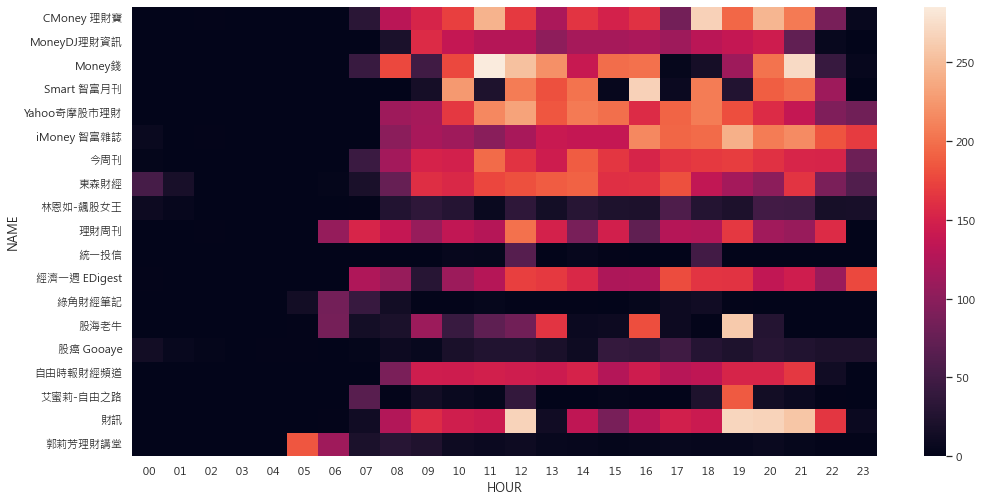

In [12]:
sns.heatmap(plotdf)

### 字數跟按讚數- Regplot, hue by name

In [13]:
plotdf = df[['NAME', 'MESSAGE_LEN', 'REACTION_COUNT']]
plotdf

,NAME,MESSAGE_LEN,REACTION_COUNT
1,Yahoo奇摩股市理財,19,31
2,Yahoo奇摩股市理財,12,10
3,Yahoo奇摩股市理財,21,2
4,Yahoo奇摩股市理財,54,70
5,Yahoo奇摩股市理財,16,5
...,...,...,...
34153,股癌 Gooaye,386,1336
34154,股癌 Gooaye,356,2741
34155,股癌 Gooaye,130,3681
34156,股癌 Gooaye,218,5191


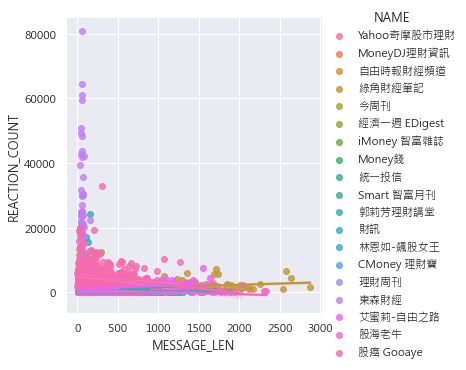

In [14]:
sns.lmplot(x='MESSAGE_LEN', y='REACTION_COUNT', data=plotdf, hue='NAME')

## 斷詞器

### 資料清理

In [15]:
sentence = df['MESSAGE'][9]
sentence

'佳世達殖利率達8%\n10年磨一艦隊...\n一張表看懂佳世達「大艦隊」手上有哪些好牌!?'

In [16]:
# def processed_sentence(sentence):
#     proc_sentence = re.sub('[^\u4e00-\u9fa5]', ' ', sentence)
#     proc_sentence = re.sub(' {1,}', ' ', proc_sentence)
#     proc_sentence = re.sub(' $', '', proc_sentence)
#     proc_sentence = re.sub('^ ', '', proc_sentence)
#     return proc_sentence
# processed_sentence(sentence)

In [17]:
# df['PROC_MESSAGE'] = df['MESSAGE'].apply(lambda x: processed_sentence(x))
# print(df.shape)
# df.head(3)

### 手動新增
- jieba 的是詞庫是來自於1995年的人民日報訓練而得，一方面時間距今已久，另方面則是中國的語料庫，跟我們的習慣難免會不一樣，使用時可以適當的添加關鍵詞提升斷詞效果

In [18]:
np.array(jieba.lcut(sentence))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.482 seconds.
Prefix dict has been built successfully.


array(['佳世達殖', '利率', '達', '8%', '\n', '10', '年磨', '一艦隊', '...', '\n',
       '一張', '表看', '懂佳世達', '「', '大艦隊', '」', '手上', '有', '哪些', '好牌', '!',
       '?'], dtype='<U4')

In [19]:
words = ['存股族', '資金', '瑞幸咖啡', '台中', '資產', '公開', '強強滾', '大盤', '覺得', '佈局', '宅女', '搶買', '投資', '上漲', '後悔', '房地產', 
         '以房養老', '留房養老', '殖利率', '佳世達']
for word in words:
    jieba.add_word(word)

In [20]:
np.array(jieba.lcut(sentence))

array(['佳世達', '殖利率', '達', '8%', '\n', '10', '年磨', '一艦隊', '...', '\n',
       '一張', '表看', '懂', '佳世達', '「', '大艦隊', '」', '手上', '有', '哪些', '好牌',
       '!', '?'], dtype='<U3')

### 新詞偵測
- 手動新增字詞太累了，嘗試透過演算法幫我們找出新詞

In [21]:
df['PROC_MESSAGE'] = df['MESSAGE'].apply(lambda x: re.sub('[^\u4e00-\u9fa5]', '', x))
count_vect = CountVectorizer(ngram_range=(2,4), analyzer='char', max_features=50) # analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’
bow_rep = count_vect.fit_transform(df['PROC_MESSAGE'])
count_vect.vocabulary_.keys()

dict_keys(['大家', '台積', '積電', '台積電', '台灣', '怎麼', '利率', '公司', '不是', '股票', '今年', '沒有', '還是', '可以', '產業', '什麼', '一個', '自己', '投資', '可能', '全球', '開始', '股市', '理財', '美國', '市場', '時間', '中國', '指數', '台股', '疫情', '股價', '知道', '我們', '如何', '分析', '獲利', '就是', '香港', '因為', '美股', '成長', '經濟', '免費', '一週', '濟一', '經濟一', '智富', '濟一週', '經濟一週'])

In [22]:
for word in count_vect.vocabulary_.keys():
    jieba.add_word(word)

In [23]:
df['PROC_MESSAGE'] = df['MESSAGE'].apply(lambda x: jieba.lcut(x))
df.head(3)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR,MESSAGE_LEN,PROC_MESSAGE
1,Yahoo奇摩股市理財,2022-03-10 11:31:18,前幾天進場的「勇士」們，今天都賺翻了…,4910877802330789,114062348679049,2,31,0,1,AQHRrfNWJ-oG9Pn_91_MwKZAzc7HbxxuA9FMkbUVle2Gw7...,...,0,0,0,0,2022-04-14 11:25:09,2022-03-10,2022-03,11,19,"[前, 幾天, 進場, 的, 「, 勇士, 」, 們, ，, 今天, 都, 賺, 翻, 了, …]"
2,Yahoo奇摩股市理財,2022-03-09 17:57:56,大家要來救台積電嗎？😂🤪,4908901329195103,114062348679049,2,10,1,1,AQHRGWpKpLQ50FtT6qT9X3ZsqUqwzv2dbzMFjLbTWh61qg...,...,0,0,0,0,2022-04-14 11:25:09,2022-03-09,2022-03,17,12,"[大家, 要來, 救, 台積電, 嗎, ？, 😂, 🤪]"
3,Yahoo奇摩股市理財,2022-03-09 18:03:04,小編不只要買一送一，還想要買大送大(喂)😂,4908129385938964,114062348679049,1,2,1,0,AQHR-36oL7T192FjleJUhIM9YL4qB2xd7_ZaG0uPS9qEDC...,...,0,0,0,0,2022-04-14 11:25:09,2022-03-09,2022-03,18,21,"[小編, 不, 只要, 買, 一送, 一, ，, 還, 想要, 買大送, 大, (, 喂, ..."


In [24]:
for sent in df['PROC_MESSAGE'][:5]:
    print(sent)
    print('====')

['前', '幾天', '進場', '的', '「', '勇士', '」', '們', '，', '今天', '都', '賺', '翻', '了', '…']
====
['大家', '要來', '救', '台積電', '嗎', '？', '😂', '🤪']
====
['小編', '不', '只要', '買', '一送', '一', '，', '還', '想要', '買大送', '大', '(', '喂', ')', '😂']
====
['台灣', '不', '只', '缺', '工人', '，', '就連', '工地', '主任', '也', '找', '不到', '人', '，', '甚至', '有', '建商', '開出', '月薪', '12', '萬', '、', '月', '休', '10', '天', '和', '2', '個', '月', '年', '假', '的', '超', '誘人', '薪資', '與', '福利', '😲']
====
['等等', '...', '那電動', '車的電', '怎麼', '來', '的', '😝']
====


## 情感分析

### 統計值法

In [25]:
df.groupby('DATE')[['LIKE', 'HAHA', 'LOVE', 'WOW', 'CARE', 'ANGRY', 'SAD']].sum()

,LIKE,HAHA,LOVE,WOW,CARE,ANGRY,SAD
DATE,,,,,,,
2021-06-01,28224,3022,230,473,194,481,224
2021-06-02,22951,709,98,310,50,104,94
2021-06-03,22127,1526,203,306,103,266,1486
2021-06-04,25506,1257,307,271,117,138,63
2021-06-05,12475,406,78,114,25,38,27
...,...,...,...,...,...,...,...
2022-03-27,71832,23247,453,1422,133,38,113
2022-03-28,45144,4684,276,995,570,86,109
2022-03-29,61967,4388,408,821,185,90,197


### 詞典法

#### 情感詞庫
- 哈大: 
  - https://github.com/ZaneMuir/DLUT-Emotionontology
  - 情感语料库的构建和分析 徐琳宏 ,林鸿飞 ,赵 晶
- 台大情感詞庫
  - http://rportal.lib.ntnu.edu.tw/bitstream/20.500.12235/80604/1/ntnulib_ja_A1021_4401_024.pdf
  - https://www.rdocumentation.org/packages/tmcn/versions/0.2-13/topics/NTUSD
  - https://rdrr.io/rforge/tmcn/
- 缺點是通用的情感詞典無法適用特定的情境

In [26]:
# NTUSD
neg_words = pd.read_csv('./sent_dict/NTUSD_traditional/NTUSD_negative_unicode.txt', header=None)[0].to_list()
print(neg_words[:30])
print('=============')
pos_words = pd.read_csv('./sent_dict/NTUSD_traditional/NTUSD_positive_unicode.txt', header=None)[0].to_list()
print(pos_words[:30])

['一下子爆發', '一下子爆發的一連串', '一巴掌', '一再', '一再叮囑', '一拳', '一般殺人罪', '一陣狂風', '一陣緊張', '一掌', '一團糟', '一摑', '一點點', '一蹶不振', '人事不省', '人為', '人為的', '入迷', '入迷的', '入迷的人', '刀刃', '刁難', '力盡', '匕首', '下地獄', '下垂', '下垂度', '下流', '下流的', '下降']
['一帆風順', '一帆風順的', '一流', '一致', '一致的', '了不起', '了不起的', '了解', '人性', '人性的', '人格高尚', '人格高尚的', '人情', '人情味', '入神', '入神的', '入迷', '入迷的', '上好', '上好的', '上等', '上等的', '口頭通過', '大方', '大方的', '大無畏', '大無畏的', '大量的', '大膽', '大膽的']


In [30]:
# 大連理工大學
sentment_keywords = pd.read_excel('./sent_dict/情感词汇本体/情感词汇本体.xlsx')
sentment_keywords.groupby('情感分类').head(2)

,词语,词性种类,词义数,词义序号,情感分类,强度,极性,辅助情感分类,强度.1,极性.1,Unnamed: 10,Unnamed: 11
0,脏乱,adj,1.0,1.0,NN,7,2,NaN,NaN,NaN,NaN,NaN
1,糟报,adj,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
2,早衰,adj,1.0,1.0,NE,5,2,NaN,NaN,NaN,NaN,NaN
5,战祸,noun,1.0,1.0,ND,5,2,NC,5.0,2.0,NaN,NaN
7,折辱,noun,1.0,1.0,NE,5,2,NN,5.0,2.0,NaN,NaN
9,清峻,adj,1.0,1.0,PH,5,0,NaN,NaN,NaN,NaN,NaN
10,清莹,adj,1.0,1.0,PH,5,1,NaN,NaN,NaN,NaN,NaN
18,瑞雪,noun,1.0,1.0,PA,5,1,NaN,NaN,NaN,NaN,NaN
19,擅名,noun,1.0,1.0,PD,7,1,NaN,NaN,NaN,NaN,NaN
20,神采,adj,1.0,1.0,PA,5,1,PH,1.0,1.0,NaN,NaN


In [32]:
def sent_score(sent):
    pos_score = 0
    neg_score = 0
    for word in sent:
        if word in pos_words:
            pos_score = pos_score + 1
        if word in neg_words:
            neg_score = neg_score + 1
    return pos_score, neg_score

In [33]:
sentence = ['今天', '是', '一帆風順', '的', '一天', '因為', '我', '吃到', '一份', '上等', '的', '鮭魚']
sent_score(sent = sentence)

(2, 0)

In [34]:
sentence = ['我', '以為', '今天', '的', '天氣', '很好', '但', '現實', '給了我', '一拳']
sent_score(sent = sentence)

(1, 2)

#### 自定義關鍵詞
根據最常出現的詞來標資料即可

In [36]:
neg_words = ['跳空', '競爭', '懷疑', '庫存', '封城', '憂心']
pos_words = ['強勢', '傑出', '解決', '上漲']

In [37]:
sentence = ['台積電', '的', '股價', '強勢', '上漲', '但是', '上海', '的', '封城', '令人', '憂心']
sent_score(sent = sentence)

(2, 2)

### 套件法
- 英文的可以看NLTK
- 但是要留意準確度的問題，因為每個人要應用的場景不會完全相同

In [38]:
# NLTK
sentence = '''
It was one of the worst movies I've seen, despite good reviews. 
Unbelievably bad acting!! Poor direction. VERY poor production. 
The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!
'''
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'compound': -0.9921}

In [39]:
# SnowNLP
s = SnowNLP('這個東西真的很棒')
s.sentiments

0.8587303470185047

### 翻譯法

In [40]:
translator= Translator(from_lang='zh-TW', to_lang='en')
translation = translator.translate("對的事情做，不對的事情不要做")
print(translation)

Do the right thing, don't do the wrong thing


In [42]:
translator= Translator(from_lang='zh-TW', to_lang='en')
translation = translator.translate("最困難的不是面對挫折打擊，最困難的是面對各種挫折打擊，卻沒有失去對人世的熱情")
print(translation)

The hardest part is not to fight against setbacks, the hardest part is to fight all kinds of setbacks without losing enthusiasm for the world.


In [43]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(translation)

{'neg': 0.08, 'neu': 0.701, 'pos': 0.219, 'compound': 0.4847}

### 爬蟲法
- https://ai.baidu.com/tech/nlp_apply/sentiment_classify
- 註冊帳號可以體驗xx次，註冊時記得切換成英文模式才能用各國的手機號碼註冊
- 次数包售卖方式低至15元/万次
- Baidu
- Wiser AI Lab
- 騰訊
- Google

In [44]:
# wiser ai lab
url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
data = {'text':'遭標普降評 俄瀕臨百年首見違約、威脅要告上法院',
        'model':'dl',
        'output_level':'subject',
        'show_scores':'true'}
resp = requests.post(url, json=data) 
resp.json()

{'docid': None,
 'is_successful': True,
 'message': '',
 'overall_res': {'sentiment': -1, 'sentiment_score': 0},
 'detail_res': []}

In [47]:
# Baidu 
url = 'https://ai.baidu.com/aidemo'
data = {'apiType': 'nlp', 
        'type': 'sentimentClassify',
        't1': '配置顶级，不解释，手机需要的各个方面都很完美'}
headers = {#'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36 Edg/100.0.1185.36',
           'Referer': 'https://ai.baidu.com/tech/nlp_apply/sentiment_classify',
           #'Cookie': 'BIDUPSID=E0582E523094D54656A4CE3CB7FB5DF3; PSTM=1633936744; delPer=0; PSINO=7; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm; BDRCVFR[-pGxjrCMryR]=mk3SLVN4HKm; __yjs_duid=1_9f74ae9a0fa5d333e5ba0baf726e52f21633936764466; BDRCVFR[tox4WRQ4-Km]=mk3SLVN4HKm; BDRCVFR[CLK3Lyfkr9D]=mk3SLVN4HKm; BAIDUID=4A33FD249321093E112E4D874DE8D202:FG=1; BDRCVFR[Txj84yDU4nc]=mk3SLVN4HKm; ZD_ENTRY=google; BDRCVFR[Tp5-T0kH1pb]=mk3SLVN4HKm; ariaDefaultTheme=undefined; Hm_lvt_8b973192450250dd85b9011320b455ba=1649487582; __cas__st__469=NLI; __cas__id__469=0; __cas__rn__=0; BDORZ=FAE1F8CFA4E8841CC28A015FEAEE495D; BDUSS=9mcHREYjVGfi1CdmZqeFZBN2haRFhyfmxINVltNlNkVjduS3NFT1Ryc212M2hpRUFBQUFBJCQAAAAAAAAAAAEAAABX1t6uRHVtbXkwOTE5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYyUWImMlFiLW; BDUSS_BFESS=9mcHREYjVGfi1CdmZqeFZBN2haRFhyfmxINVltNlNkVjduS3NFT1Ryc212M2hpRUFBQUFBJCQAAAAAAAAAAAEAAABX1t6uRHVtbXkwOTE5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYyUWImMlFiLW; ai-studio-ticket=C4ACCD1E9E3347C696E1C3F8B580C460844A09ED733049D9B653EAD56FC770D6; jsdk-uuid=a417b9fe-f986-4ce9-8610-2864bfa2f5a5; BAIDUID_BFESS=4A33FD249321093E112E4D874DE8D202:FG=1; H_PS_PSSID=36071_36056_35912_36166_34584_36144_36120_36194_35978_36125_35802_36261_26350_36111_36092_36061; Hm_lpvt_8b973192450250dd85b9011320b455ba=1649569380',
           #'DNT': '1',
           #'Host': 'ai.baidu.com',
           #'Origin': 'https://ai.baidu.com',
           #'sec-ch-ua-platform': "Windows",
           #'Accept-Encoding': 'gzip, deflate, br',
           #'Accept-Language': 'en,en-GB;q=0.9,zh-TW;q=0.8,zh;q=0.7,en-US;q=0.6,zh-CN;q=0.5',
           #'Content-Length': '62',
           #'Content-Type': 'application/x-www-form-urlencoded'
          }
resp = requests.post(url, data=data, headers=headers) 
resp.json()

{'errno': 0,
 'msg': 'success',
 'data': {'log_id': '5262078054214626766',
  'text': '配置顶级，不解释，手机需要的各个方面都很完美',
  'items': [{'positive_prob': 0.999956,
    'confidence': 0.999901,
    'negative_prob': 4.44644e-05,
    'sentiment': 2}]}}

### 借模型法
- 騰訊
- wiserlabai
- 華為
- 百度

In [6]:
# # !pip install baidu-aip
# from aip import AipNlp
# APP_ID = '25938061'
# API_KEY = 'UzqA7VEKAsuHK5GOxvgRmFuM'
# SECRET_KEY = 'xxxxxxxxxxxxxxxx'
# client = AipNlp(appId = APP_ID, apiKey=API_KEY, secretKey=SECRET_KEY)
# text = '對的事情做，不對的事情不要做'
# client.sentimentClassify(text)
# client.emotion(text)

{'items': [{'prob': 0.999936,
   'label': 'neutral',
   'subitems': [],
   'replies': []},
  {'prob': 6.36578e-05, 'label': 'pessimistic', 'subitems': [], 'replies': []},
  {'prob': 4.43924e-07, 'label': 'optimistic', 'subitems': [], 'replies': []}],
 'text': '對的事情做，不對的事情不要做',
 'log_id': 1513093663081421552}

### 模型法
- 收集資料 >> 標註資料 >> 訓練模型 >> 效度 >> 
- Key point: How to label data?

#### Label

In [ ]:
## 1=正向，-1=負向， 混合或其他的貼文就 0, 
## 可以限制在不要這麼多廣告的粉絲頁@@，不然標資料好辛苦
sent_df = []
pos_cnt = 0
neg_cnt = 0
while True:
    print('Progess >> positive count: {}/10, negative count: {}/10'.format(pos_cnt, neg_cnt))
    rand = np.random.choice(df.shape[0])
    print(df['NAME'][rand])
    print(df['MESSAGE'][rand])
    sent = input('Sentiment Score: ')
    if sent == '1':
        sent_df.append([df['PROC_MESSAGE'][rand], sent])
        pos_cnt = pos_cnt + 1
        print(pos_cnt)
    if sent == '2':
        sent_df.append([df['PROC_MESSAGE'][rand], sent])
        neg_cnt = neg_cnt + 1
    if pos_cnt >= 10 & neg_cnt >= 10:
        break
    clear_output()
sent_df = pd.DataFrame(sent_df, columns=['PROC_MESSAGE', 'SENTIMENT'])
sent_df

#### Model building
- 因為 label 的資料非常少，可能用 pretrain 的 model 來訓練會合適一些
- https://spacy.io/api/cli#download
- https://spacy.io/usage/models#download-pip

In [2]:
sent_df = pd.read_excel('./data/GooglePlay_Comments.xlsx')
sent_df['SENTIMENT'] = sent_df['Sentimen'].apply(lambda x: int(re.findall('[0-9]{1,}', x)[0]))
sent_df['SENTIMENT2'] = np.select(condlist = [sent_df['SENTIMENT']>=4, sent_df['SENTIMENT']<=2, sent_df['SENTIMENT']==3], 
                                  choicelist = ['pos', 'neg', 'neu'])
sent_df

,Unnamed: 0,Name,Timestamp,Content,Sentimen,likecounts,SENTIMENT,SENTIMENT2
0,0,李宗翰,2020年6月29日,不錯,獲評為 5 顆星 (滿分 5 顆星),0,5,pos
1,1,Ning Hsu,2020年6月29日,已經等了有一週了，還沒收到退費的簡訊通知，若我到銀行確認並無退費，那我會尋求法律幫助。（20...,獲評為 1 顆星 (滿分 5 顆星),13,1,neg
2,2,宋佳宸,2020年6月29日,還不錯，挺方便的,獲評為 5 顆星 (滿分 5 顆星),0,5,pos
3,3,翁嘉雯,2020年6月29日,好,獲評為 5 顆星 (滿分 5 顆星),0,5,pos
4,4,蔡曜安,2020年6月29日,系統說外送員還在路上，但是實際上卻已經到了，讓外送員等我下樓真的很不好意思！,獲評為 2 顆星 (滿分 5 顆星),0,2,neg
...,...,...,...,...,...,...,...,...
2795,2795,曾小倩,2020年5月26日,越來越爛 這兩個月就遇到三次訂單問題 1.之前訂購兩張訂單，有一張訂單店家根本沒收到，白白等...,獲評為 1 顆星 (滿分 5 顆星),123,1,neg
2796,2796,Dino Leong,2020年5月26日,送餐常出错: 1. 东西少送或送错人。 2. 送餐员要求小费。 3. 餐卷常不能用。 4. ...,獲評為 3 顆星 (滿分 5 顆星),0,3,neu
2797,2797,鬥魚寶寶,2020年5月26日,不錯,獲評為 5 顆星 (滿分 5 顆星),0,5,pos
2798,2798,郭咚咚,2020年5月26日,速度快，讚,獲評為 5 顆星 (滿分 5 顆星),0,5,pos


In [16]:
sent_df.groupby('SENTIMENT2').head(5)

,Unnamed: 0,Name,Timestamp,Content,Sentimen,likecounts,SENTIMENT,SENTIMENT2,VECTOR
0,0,李宗翰,2020年6月29日,不錯,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[0.9518938, 0.34804937, 1.0348014, -0.9213637,..."
1,1,Ning Hsu,2020年6月29日,已經等了有一週了，還沒收到退費的簡訊通知，若我到銀行確認並無退費，那我會尋求法律幫助。（20...,獲評為 1 顆星 (滿分 5 顆星),13,1,neg,"[-0.23151922, -0.0362966, 0.4472762, 0.3360945..."
2,2,宋佳宸,2020年6月29日,還不錯，挺方便的,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[0.4050724, -0.45165345, 1.2731235, -0.8758145..."
3,3,翁嘉雯,2020年6月29日,好,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[1.2242163, -0.78918695, 1.0881473, 0.3101771,..."
4,4,蔡曜安,2020年6月29日,系統說外送員還在路上，但是實際上卻已經到了，讓外送員等我下樓真的很不好意思！,獲評為 2 顆星 (滿分 5 顆星),0,2,neg,"[0.07398332, -0.35432908, 1.0131031, 0.0328675..."
5,5,許馨馨,2020年6月29日,一天到晚都要更新才能用 到底是要更新什麼 菜單也沒看到有什麼更新,獲評為 1 顆星 (滿分 5 顆星),0,1,neg,"[0.19831964, -0.09240034, 0.15621914, -0.60718..."
6,6,周奕成,2020年6月29日,找不到餐廳,獲評為 1 顆星 (滿分 5 顆星),0,1,neg,"[0.29441524, 1.130099, -0.34883997, -1.0443554..."
7,7,David Huang,2020年6月29日,吱吱吱吱叫床,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[1.157313, -0.54712355, 0.41269487, -0.1169447..."
8,8,陳晴江,2020年6月29日,今天停擺,獲評為 4 顆星 (滿分 5 顆星),0,4,pos,"[-0.12941298, -1.2934084, -0.56026745, 1.65173..."
9,9,Sharon Hsu,2020年6月29日,送餐時間一延再延！等到火大還不能取消訂單,獲評為 1 顆星 (滿分 5 顆星),0,1,neg,"[0.6152732, -0.23885603, 0.31677023, 0.3925186..."


In [19]:
# pip install -U spacy
# python -m spacy download zh_core_web_md
# python -m spacy download zh_core_web_sm
import spacy
# nlp = spacy.load('zh_core_web_sm')
nlp = spacy.load('zh_core_web_md')

In [20]:
sent_df['VECTOR'] = sent_df['Content'].apply(lambda x: nlp(x).vector)
sent_df.head(3)

,Unnamed: 0,Name,Timestamp,Content,Sentimen,likecounts,SENTIMENT,SENTIMENT2,VECTOR
0,0,李宗翰,2020年6月29日,不錯,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[-0.040325016, -0.030249953, -1.059855, -0.629..."
1,1,Ning Hsu,2020年6月29日,已經等了有一週了，還沒收到退費的簡訊通知，若我到銀行確認並無退費，那我會尋求法律幫助。（20...,獲評為 1 顆星 (滿分 5 顆星),13,1,neg,"[-0.004285417, 1.2450752, 1.0265211, -0.716679..."
2,2,宋佳宸,2020年6月29日,還不錯，挺方便的,獲評為 5 顆星 (滿分 5 顆星),0,5,pos,"[-0.18201004, 1.1358386, 0.6384772, -1.2461872..."


In [21]:
train_x_vectors = [nlp(text).vector for text in sent_df['Content']]

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, sent_df['SENTIMENT2'])

SVC(kernel='linear')

In [26]:
test_x = ['還不錯，挺方便的', 
          '外送員真的很棒很用心，食物到手上的時候還是熱的',
          '我覺得表現一般，跟對手的表現都一樣',
          '外送員的表現真的很優秀，把湯的灑到處都是',
          '有些外送完全擺臭臉，沒禮貌',
          '對的事情做，不對的事情不要做',
          '不錯']
test_x_vectors = [nlp(text).vector for text in test_x]
clf_svm.predict(test_x_vectors)

array(['pos', 'pos', 'neg', 'neg', 'neu', 'neu', 'pos'], dtype=object)

## EDA2

### 看情感分數變化
異常低/高的時候是不是有特殊的事件發生!

In [59]:
sentiment_df = df.loc[df['DATE']>='2022-01-01']
sentiment_df = sentiment_df.groupby('DATE')[['LIKE', 'HAHA', 'LOVE', 'WOW', 'CARE', 'ANGRY', 'SAD']].sum()

std = StandardScaler()
sentiment_df = pd.DataFrame(std.fit_transform(sentiment_df), columns = sentiment_df.columns, index=sentiment_df.index)
sentiment_df

,LIKE,HAHA,LOVE,WOW,CARE,ANGRY,SAD
DATE,,,,,,,
2022-01-01,-1.234999,-0.788296,-0.426951,-0.314755,-0.737201,-0.300638,-0.424009
2022-01-02,-0.915245,-0.821660,-0.398287,-0.714507,-0.635717,-0.304031,-0.446030
2022-01-03,-0.593352,-0.687080,-0.373150,-0.602101,-0.584975,-0.298941,-0.436243
2022-01-04,-0.190192,-0.653998,-0.298183,-0.610809,-0.569752,-0.319301,-0.415445
2022-01-05,-0.610372,-0.756622,-0.377119,-0.575979,-0.587512,-0.319301,-0.379967
...,...,...,...,...,...,...,...
2022-04-10,-0.241252,0.921260,-0.318468,-0.395497,-0.379469,-0.232771,-0.149971
2022-04-11,1.253468,0.836796,-0.227625,0.263104,0.554188,-0.063103,0.021303
2022-04-12,0.289929,-0.390329,-0.288481,-0.183352,-0.283059,0.059057,-0.264969


In [39]:
sentiment_df_stk = sentiment_df[['LIKE', 'HAHA', 'LOVE', 'WOW', 'CARE', 'ANGRY', 'SAD']].stack().reset_index()
sentiment_df_stk.columns = ['DATE', 'REACTION_TYPE', 'CNT']
sentiment_df_stk['DATE'] = sentiment_df_stk['DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
sentiment_df_stk

,DATE,REACTION_TYPE,CNT
0,2022-01-01,LIKE,-1.234999
1,2022-01-01,HAHA,-0.788296
2,2022-01-01,LOVE,-0.426951
3,2022-01-01,WOW,-0.314755
4,2022-01-01,CARE,-0.737201
...,...,...,...
723,2022-04-14,LOVE,-0.448559
724,2022-04-14,WOW,-0.836411
725,2022-04-14,CARE,-0.765110
726,2022-04-14,ANGRY,-0.344752


<AxesSubplot:xlabel='DATE', ylabel='CNT'>

/home/tlyu0419/pyenvs/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


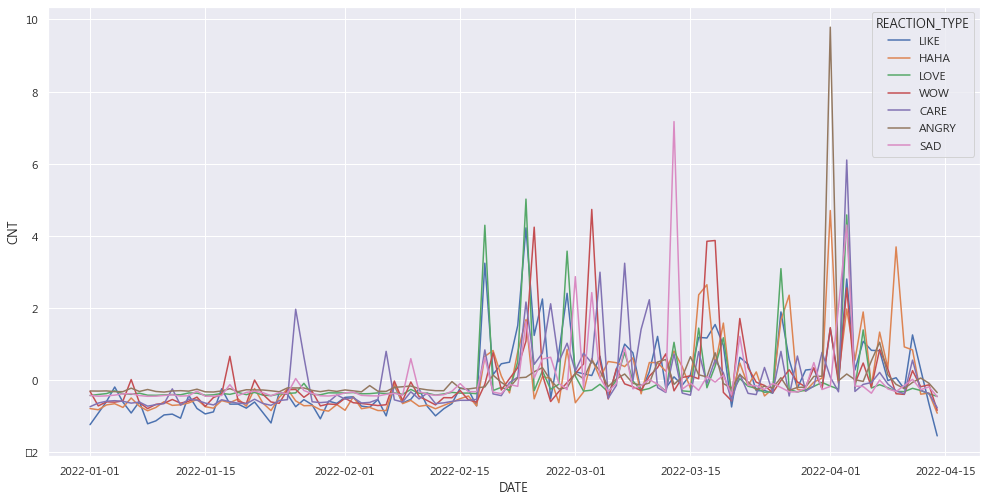

In [40]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.lineplot(x = 'DATE', y='CNT', data=sentiment_df_stk, hue='REACTION_TYPE')

In [41]:
sentiment_df_stk.sort_values(['REACTION_TYPE', 'CNT'], ascending= [True, False]).groupby('REACTION_TYPE').head(5)

,DATE,REACTION_TYPE,CNT
635,2022-04-01,ANGRY,9.786103
677,2022-04-07,ANGRY,1.051613
537,2022-03-18,ANGRY,0.758088
516,2022-03-15,ANGRY,0.649501
495,2022-03-12,ANGRY,0.573150
648,2022-04-03,CARE,6.102848
459,2022-03-07,CARE,3.240988
438,2022-03-04,CARE,2.992351
480,2022-03-10,CARE,2.228681
375,2022-02-23,CARE,2.165253


In [63]:
# sentiment_df_stk.sort_values(['REACTION_TYPE', 'CNT'], ascending= [True, True]).groupby('REACTION_TYPE').head(5)

In [54]:
df.sort_values('ANGRY', ascending=False).head(15)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR
31628,東森財經,2022-04-01 00:51:13,TACO編：比賽車比不過就比國力？\n杰尼龜嗆大陸就是規則！2min猛罵台友狂勸別衝動\n\...,4445191822249519,127254684043276,11509,30078,1223,9758,AQHRYxKhSpqGOILUGZ1Lhm7aGcvUCREYihFA33blzFoH9H...,...,110,7279,5648,61,216,114,2022-04-14 07:37:44,2022-04-01,2022-04,00
29218,東森財經,2022-04-07 18:35:21,TACO編：男人啊...不服輸就不太對了喔\n杰尼龜輸不起直播怒嗆！質疑廖老大：成績一定造假...,4462706380498063,127254684043276,2441,5518,87,2176,AQHRKEaV9tDRrHBh2bZH9ajPoze0pQxHT8Hkfo6YufVDvn...,...,8,2255,516,8,29,4,2022-04-14 07:37:44,2022-04-07,2022-04,18
31486,東森財經,2022-03-18 23:45:00,我愛一條柴：怎麼沒有我想聽的3個關鍵字呢？\n賓士大媽開車門險擊落！騎士驚抖大吼3字被讚爆\...,4410763052359063,127254684043276,201,1271,48,178,AQHRON6TAZtuUlcJ0aicHFkwS8SbidzEOs8vdIlH-TtlRm...,...,5,48,485,2,99,1,2022-04-14 07:37:44,2022-03-18,2022-03,23
32142,東森財經,2022-03-12 14:45:01,我愛一條柴：這角度不就是給狗勾吃的嗎XD?\n狗勾偷咬媽手中蘋果！遭挨罵怒K委屈全都錄\n\...,4394487320653303,127254684043276,342,3480,91,316,AQHR_x_6Ur8VlPsuYbUg1ZLBo3R4eWLx77jCkTX1AjzBkq...,...,8,1080,473,19,23,3,2022-04-14 07:37:44,2022-03-12,2022-03,14
32076,東森財經,2022-03-15 12:45:00,熊熊在身編：做好了要求退餐合理嗎？\n不吃肉鬆姊點餐喊退！遭拒怒丟餐店家氣炸,4402280623207306,127254684043276,643,1245,61,421,AQHR1-G4xxOK8yQxC0PQJLlZ0hXJBGZR_iBhU9D7BnUHvX...,...,4,125,436,3,55,2,2022-04-14 07:37:44,2022-03-15,2022-03,12
32017,東森財經,2022-03-03 13:45:00,真嗣拿你沒辦法編：媽媽要急瘋了吧><\n寶寶被子蓋臉爸熟睡！媽看監控發毛狂叩120秒\n\n...,4370817259686976,127254684043276,2040,17240,2448,1577,AQHR4ji3_d1IjO5S1R2wJPR5nVxYwqgHtwBdnPOD1jJRQR...,...,115,188,332,2018,3499,67,2022-04-14 07:37:44,2022-03-03,2022-03,13
29428,東森財經,2022-04-06 15:18:59,夏天開冷氣沒問題\n「重點在節電」\n王美花:電費太便宜,4459764217458946,127254684043276,557,1029,48,432,AQHRhVFdmgKX3h1_RXBlLGw8ghNDWBSKYbZaMcXpiFB3t_...,...,0,244,311,7,32,1,2022-04-14 07:37:44,2022-04-06,2022-04,15
30391,東森財經,2022-02-19 00:45:01,魅力無編：跟愛犬保持社交距離？\n天兵伯遠端遛狗？超長牽繩險KO騎士\n●不良示範，請勿模仿...,4333904863378216,127254684043276,1122,13687,163,731,AQHRyJWfbO0L0Ri7QKHmBzGmaeVtoyUR8MbELDJjyRnByN...,...,16,2628,218,18,1513,14,2022-04-14 07:37:44,2022-02-19,2022-02,00
30170,東森財經,2022-02-25 22:20:00,魅力無編：如果是你的孩子浪費食物，你會怎麼做？\n童浪費食物隨意扔！父1舉動獲讚最佳身教\n...,4355562004545835,127254684043276,3638,80832,4785,2911,AQHRMaM4OVtclENsLo-vM_9LOwGHONOqx1Qc3_GqhI1G9v...,...,1188,308,192,267,440,383,2022-04-14 07:37:44,2022-02-25,2022-02,22
32128,東森財經,2022-03-11 18:45:01,真嗣拿你沒辦法編：大家認為台灣不夠方便嗎？\n上海待13年妹子回台！超震驚1事：台灣服務好？...,4392202084215160,127254684043276,750,733,40,591,AQHR0TbmOCKI63m1WhDY0izd3bSLhKO_lrSvl4xnBIDdwP...,...,2,139,159,2,8,1,2022-04-14 07:37:44,2022-03-11,2022-03,18


In [51]:
df.sort_values('SAD', ascending=False).head(5)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR
32104,東森財經,2022-03-13 09:45:00,愛在身編：心疼...既然選擇了牠就請伴牠一生！\n年邁阿金走不動遭棄！暖男照料50天助尊嚴離...,4396009263834442,127254684043276,622,18618,811,580,AQHRmSNCQwudd1Ob97wGDsmYxstxDR9UkOtNekZZ06wPWE...,...,1908,2,42,6009,20,474,2022-04-14 07:37:44,2022-03-13,2022-03,09
29404,東森財經,2022-04-03 13:45:03,貓貓編：看著牠的眼睛怎麼捨得傷害牠？\n230kg巨龜卡漁網重傷！有靈性溫馴等救援結局淚\n...,4449677535134281,127254684043276,119,14998,294,111,AQHRYh9cqBNj9DlT3zY_PhO1RNwKEgJUHUlJmkHeAiIsKf...,...,272,5,14,3558,118,1967,2022-04-14 07:37:44,2022-04-03,2022-04,13
32017,東森財經,2022-03-03 13:45:00,真嗣拿你沒辦法編：媽媽要急瘋了吧><\n寶寶被子蓋臉爸熟睡！媽看監控發毛狂叩120秒\n\n...,4370817259686976,127254684043276,2040,17240,2448,1577,AQHR4ji3_d1IjO5S1R2wJPR5nVxYwqgHtwBdnPOD1jJRQR...,...,115,188,332,2018,3499,67,2022-04-14 07:37:44,2022-03-03,2022-03,13
9499,今周刊,2022-04-02 07:16:00,頂樓遺留的手機，存著女兒剛剛發給她的訊息──「媽媽，對不起。我沒資格做你的女兒。我好累，努力...,10159911518143270,158025223269,556,6590,1478,385,AQHRQxBMHHCPhlFTEKhKYFiHZcGF2u3btB1HURKFbtpzYb...,...,39,25,44,1565,82,39,2022-04-14 10:43:25,2022-04-02,2022-04,07
30447,東森財經,2022-02-23 15:45:01,無辜鱉遭魚鉤狠卡鼻！獸醫神手搶救結局暖\n#水獺編：用看的都覺得痛...\n影片授權：AP/...,4348544671914235,127254684043276,161,7070,134,152,AQHRhtGuMr-tlOvpmBKpgxQyEsaLV-J4usdg1mppvnrzte...,...,137,4,8,1499,145,143,2022-04-14 07:37:44,2022-02-23,2022-02,15


In [52]:
df.sort_values('WOW', ascending=False).head(5)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR
31481,東森財經,2022-03-18 20:45:00,真嗣拿你沒辦法編：糯米你還有什麼不會的🤣\n聰明汪教科書式顧娃！弟球掉水池1招驚險救\n\n...,4410863479015687,127254684043276,2791,43709,3180,2380,AQHRDyFaQJpXMJ-upuX04iscpCCJChPde8cdNcNyIUZdga...,...,789,1410,11,13,4576,107,2022-04-14 07:37:44,2022-03-18,2022-03,20
30193,東森財經,2022-02-24 10:45:41,太陽打從西編：大家真的要小心自己的隨身物品ㄟ\n正妹腳邊行李1秒消失！他3動作連偷震驚百萬人...,4349243101844392,127254684043276,708,17459,4730,545,AQHRNCVSjplMcS5nbRj7Keiw1RuesGIlYiOlP8S33_z4i3...,...,63,184,120,31,4525,20,2022-04-14 07:37:44,2022-02-24,2022-02,10
31382,東森財經,2022-03-17 21:45:00,大編：動作100分，技術0分...\n菜鳥扔手榴彈手滑！長官驚險跩人跳坑逃死\n\n影片來源...,4408312805937421,127254684043276,5464,49206,3605,4216,AQHRsxlR8SrMDLibRXJMYu2LfU2ozne_FP6v_ubftDS_Hf...,...,59,18994,34,60,4520,76,2022-04-14 07:37:44,2022-03-17,2022-03,21
32017,東森財經,2022-03-03 13:45:00,真嗣拿你沒辦法編：媽媽要急瘋了吧><\n寶寶被子蓋臉爸熟睡！媽看監控發毛狂叩120秒\n\n...,4370817259686976,127254684043276,2040,17240,2448,1577,AQHR4ji3_d1IjO5S1R2wJPR5nVxYwqgHtwBdnPOD1jJRQR...,...,115,188,332,2018,3499,67,2022-04-14 07:37:44,2022-03-03,2022-03,13
29413,東森財經,2022-04-03 21:45:01,我愛一條柴：孩子安靜時，真的是出大事捏=口=?\n女娃嗨玩史萊姆纏髮！慘變X頭小臉秒垮\n\...,4451566254945409,127254684043276,4471,24502,3344,3218,AQHR1xZV_O1UEu64vqDsKpQbZl_3ei-PgENLDCCkSUzgzc...,...,82,9877,40,157,2945,61,2022-04-14 07:37:44,2022-04-03,2022-04,21


In [53]:
df.sort_values('HAHA', ascending=False).head(5)

,NAME,TIME,MESSAGE,POSTID,PAGEID,COMMENT_COUNT,REACTION_COUNT,SHARE_COUNT,DISPLAYCOMMENTCOUNT,CURSOR,...,LOVE,HAHA,ANGRY,SAD,WOW,CARE,UPDATETIME,DATE,YM,HOUR
29675,東森財經,2022-04-09 18:45:01,在權志龍身編：真的是辛苦了～\n醫護爆笑催做核酸！喊下樓免化妝：這沒彭于晏\n\n影片來源：抖音,4467800656655302,127254684043276,4092,54255,9438,3033,AQHRyeDpUFhFrR4CaUlwfrnfaQ6FmM6SQlXP6RS9AqCJJi...,...,117,28226,15,12,80,82,2022-04-14 07:37:44,2022-04-09,2022-04,18
31589,東森財經,2022-04-01 20:45:00,大編：這確定沒有先全麻過嗎？\n睡死汪遭飼主偷餵藥！拉舌倒粉牠全程無感\n\n影片來源：初壹...,4447061035395931,127254684043276,3129,51520,2263,2477,AQHR2qQOafqLbUfjiHN4rXsLUe_iUQN8z5UeSVi9G2BQ9A...,...,153,24263,19,7,319,46,2022-04-14 07:37:44,2022-04-01,2022-04,20
31382,東森財經,2022-03-17 21:45:00,大編：動作100分，技術0分...\n菜鳥扔手榴彈手滑！長官驚險跩人跳坑逃死\n\n影片來源...,4408312805937421,127254684043276,5464,49206,3605,4216,AQHRsxlR8SrMDLibRXJMYu2LfU2ozne_FP6v_ubftDS_Hf...,...,59,18994,34,60,4520,76,2022-04-14 07:37:44,2022-03-17,2022-03,21
31410,東森財經,2022-03-16 20:45:02,大編：在地狗勾？\n秋田犬躺地耍賴不回家！她無奈拖嘸動1招秒治\n\n影片來源：家有秋宝陈s...,4405870336181668,127254684043276,2158,42664,2785,1658,AQHRb0S_hKK0ire4FaNQm5ES95YpSCncsp_p0E0uc52MS_...,...,367,17111,45,11,73,77,2022-04-14 07:37:44,2022-03-16,2022-03,20
31752,東森財經,2022-03-27 18:45:00,我家住海編：一秒辨認家庭地位XD\n萌娃見父母打鬧竟誤會！狠咬爸PP救援媽\n\n影片來源：...,4434137816688253,127254684043276,1994,24210,1411,1541,AQHR8V8_E99Q2cV-cPmr5lAUMR98R6zIeHzix179dNknAF...,...,68,13052,2,10,51,26,2022-04-14 07:37:44,2022-03-27,2022-03,18


In [60]:
sentiment_df = df.groupby('DATE')[['LIKE', 'HAHA', 'LOVE', 'WOW', 'CARE', 'ANGRY', 'SAD']].sum()
sentiment_df

,LIKE,HAHA,LOVE,WOW,CARE,ANGRY,SAD
DATE,,,,,,,
2021-05-18,30,0,0,0,0,0,0
2021-05-20,30,0,0,0,0,0,0
2021-05-21,1662,3,24,0,5,1,0
2021-05-24,1058,0,19,0,0,0,0
2021-05-26,771,0,4,1,0,0,0
...,...,...,...,...,...,...,...
2022-04-10,44402,13060,303,560,157,68,255
2022-04-11,94724,12460,509,1392,525,168,395
2022-04-12,62285,3743,371,828,195,240,161


In [75]:
sentiment_df.to_pickle('./sentiment_by_date.pickle')